## CAPSTONE PROJECT-1 :- PRCP-1025-FlightPricePrediction

## PROJECT TEAM ID :- PTID-CDS-NOV-23-1706


# 1.Busines Case:- To predict the flight ticket prices based on given  data
Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-Create a predictive model which will help the customers to predict future flight
prices and plan their journey accordingly.

# 2.Import Libraries:

In [502]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

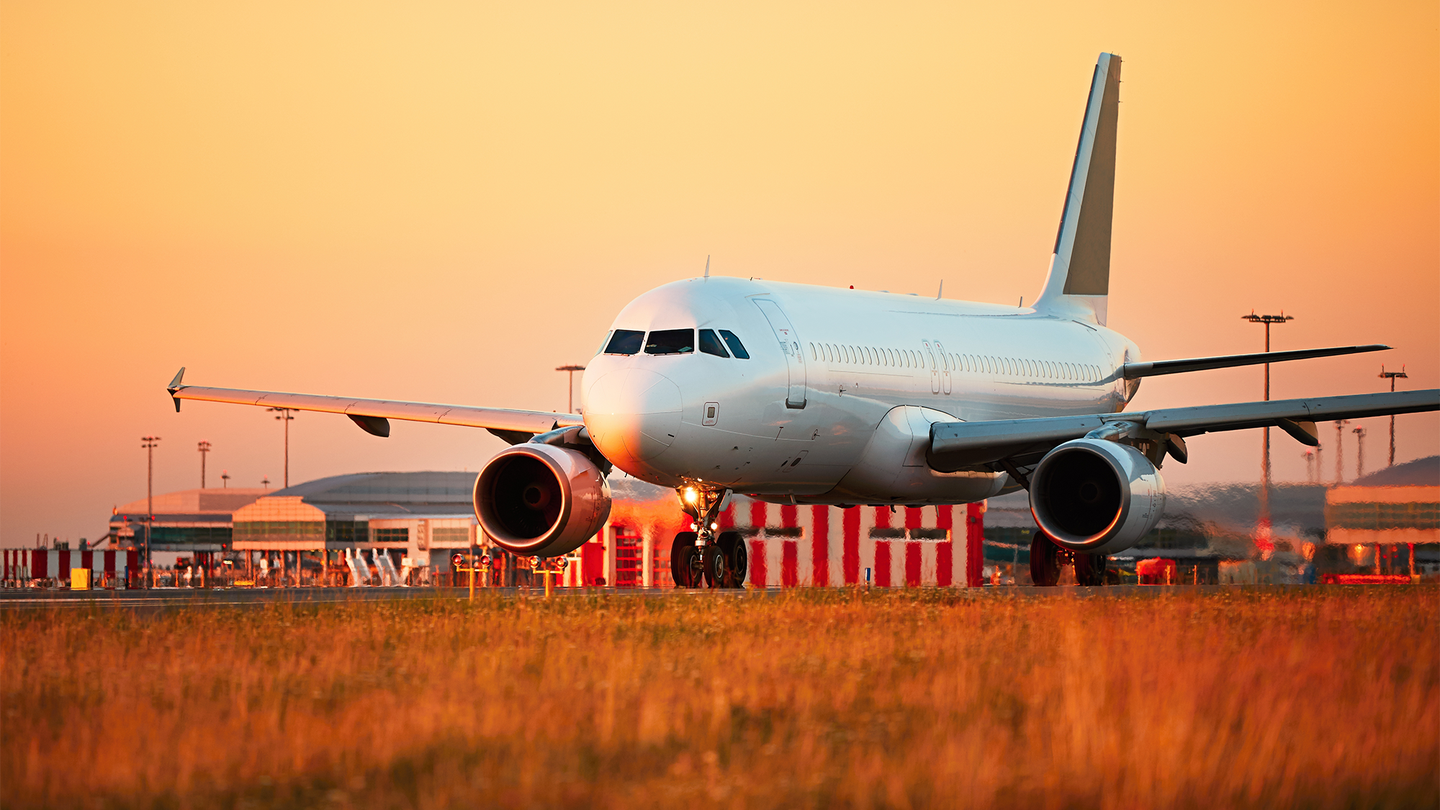

In [503]:
from IPython.display import Image
Image("AirportPlane.jpg")

# 3. Load Dataset: 

In [504]:
data = pd.read_csv("Flight_Fare.csv")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 4. Domain Analysis:


1.Airline:- The 'Airline' column represents the name of the airline company.

2.Date of Journey:- The 'Date of Journey' column stores information indicating the date of the flight's takeoff or journey.

3.Source:- The 'Source' column represents the city from which the flight departs.
 
4.Destination:- The 'Destination' column represents the city where the flight is scheduled to land. 

5.Route:- The 'Route' column specifies the path through which the flight will reach its designated destination.

6.Departure Time:- The 'Departure Time' refers to the scheduled time when the journey begins.

7.Arrival Time:- The 'Arrival Time' refers to the scheduled time when the flight reaches its intended endpoint.

8.Duration:- The 'Duration' column represents the total travel time between cities, measured in hours.

9.Total Stops:- The 'Total Stops' column stores the number of stops between the source and destination cities.

10.Additional_Info:
Any additional information or notes about the flight that might not be covered by other columns. This could include special services, amenities, or instructions.

11.Price:- The 'Price' column serves as the target variable, storing information about the ticket price.

# 5.  Basic Checks:

In [505]:
# Shape
data.shape

(10683, 11)

In [506]:
# Dtypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [507]:
# columns:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [508]:
# Head:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [509]:
# Tail:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [510]:
# Info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [511]:
# Describe:
data.describe(include=("O"))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [512]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


# 6. EDA:
## 6.1. Univariate:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

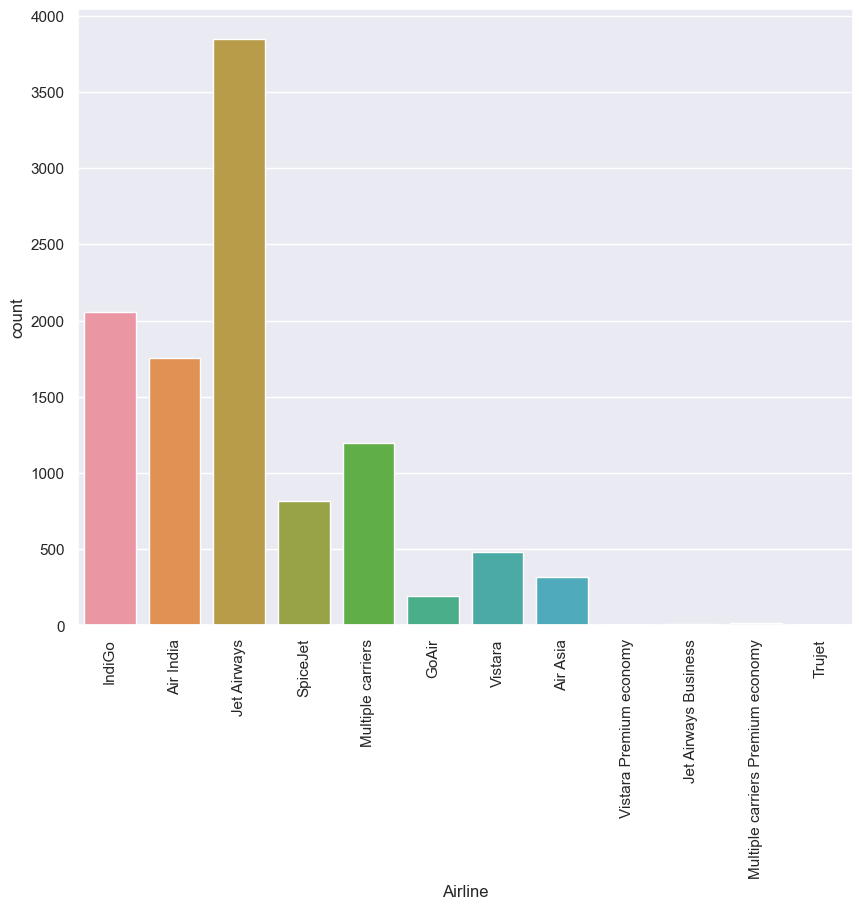

In [513]:
plt.figure(figsize=(10,8))
sns.countplot(x=data.Airline)
plt.xticks(rotation = 90)

## Insights:
* Jet Airways airline company is highest amoung all Airline company.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

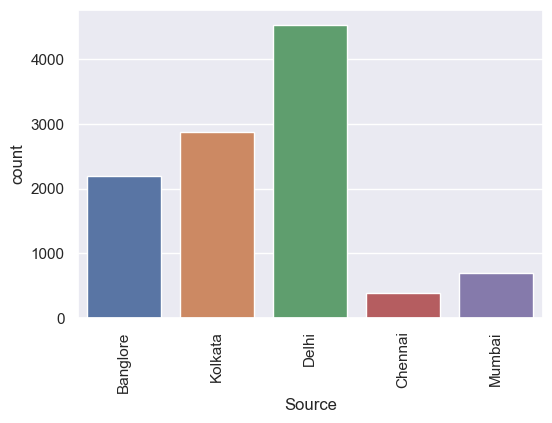

In [514]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Source)
plt.xticks(rotation = 90)

##  Insights:
* Delhi records the highest number of flight takeoffs, followed by Kolkata and Bangalore.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

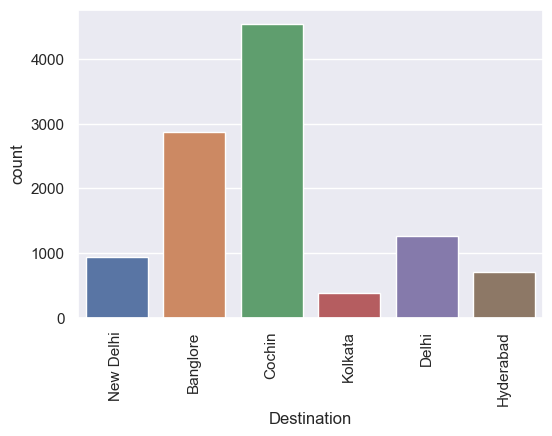

In [515]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Destination)
plt.xticks(rotation = 90)

##  Insights:
* Cochin is the destination where a highest number of flights land, followed by Bangalore.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

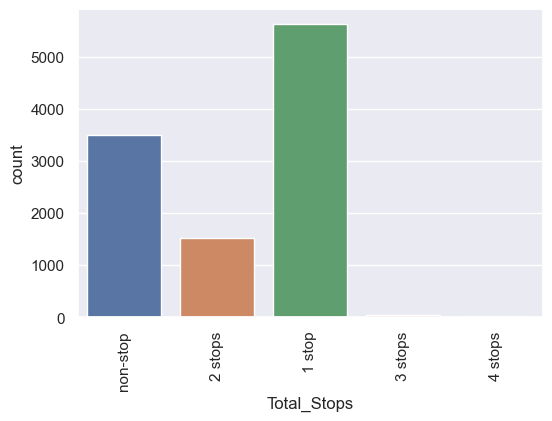

In [516]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Total_Stops)
plt.xticks(rotation = 90)

##  Insights:
* Most of flights have 1 stop or single stop than non-stop and 2 stop.

In [517]:
! pip install sweetviz

In [518]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights:

* The majority of prices are within the 20,000 range, but there are some outliers.

* The most frequent airline is Jet Airways. However, Jet Airways Business has a   much higher average price than the other lines.


* The most flights depart from Delhi, and the average price is the highest.


* Cochin is the most heavily trafficked destination. New Delhi, on the other hand, has the highest average price.


* A little more than half of the flights make single stop between the origin and destination, around one-third is direct flight.


## 6.2. Bivariate:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

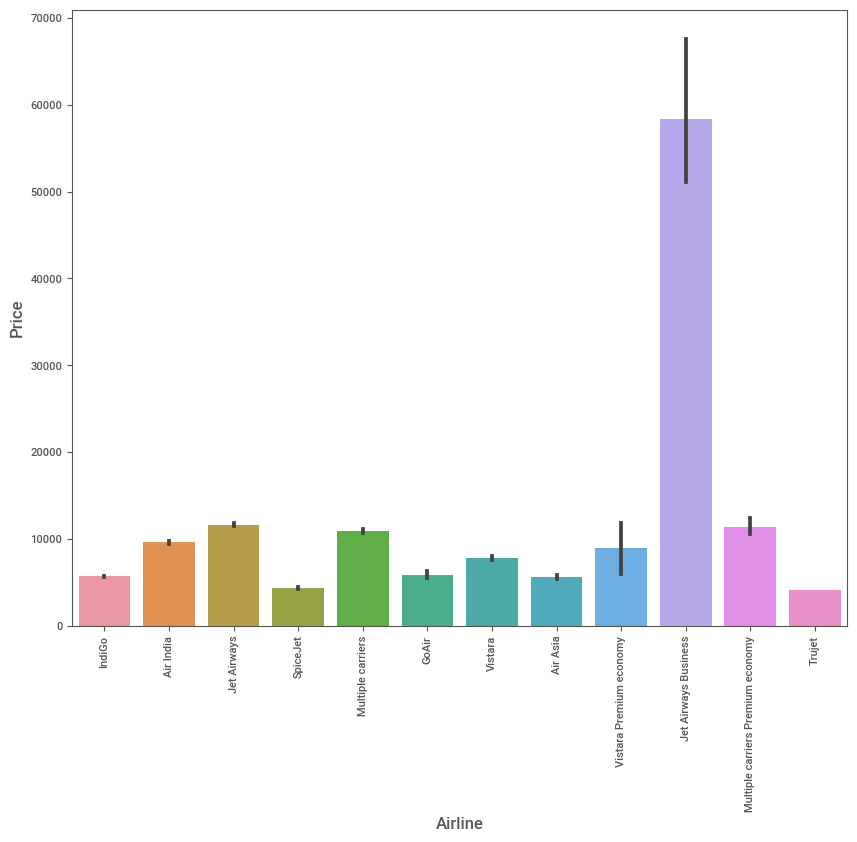

In [519]:
plt.figure(figsize=(10,8))
sns.barplot(x="Airline", y="Price",data=data)
plt.xticks(rotation = 90)

##  Insights:
* Among all airline companies, Jet Airways Business class has the highest prices.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

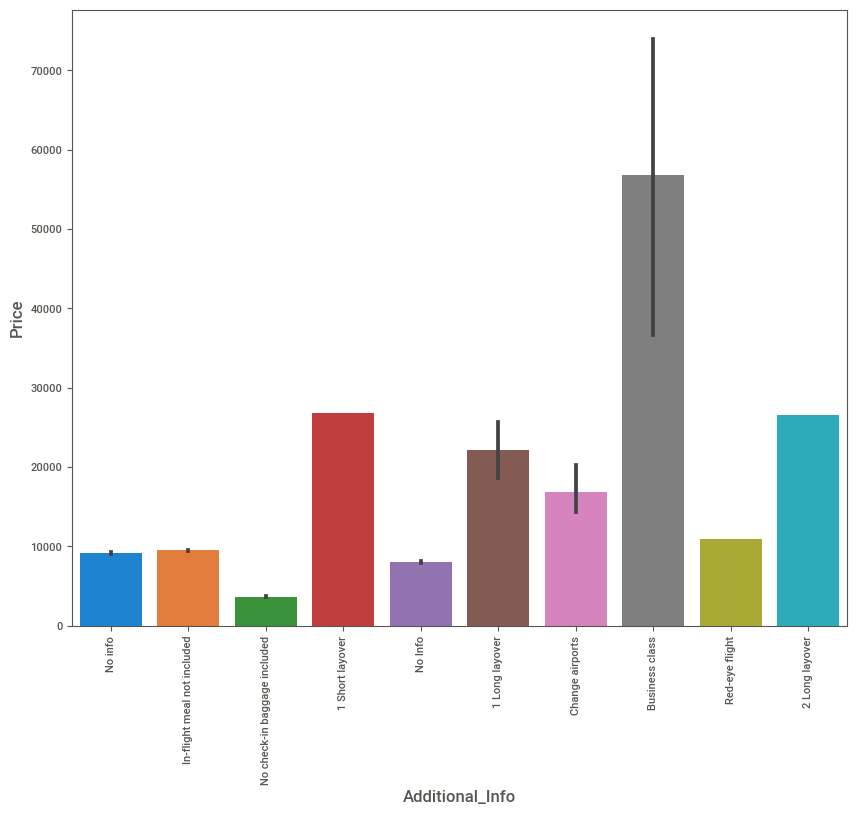

In [520]:
plt.figure(figsize=(10,8))
sns.barplot(x="Additional_Info", y="Price",data=data)
plt.xticks(rotation = 90)

##  Insights:
* In the airline industry, additional info with Business class tickets command a higher price.

# 7. Data Preprocessing:

## 7.1. Null values:

In [521]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Insights:
* There are Two null Values so we are dropping them:
* 1 in Route
* 1 in Total_Stops

In [522]:
# drop null Values:
data.dropna(inplace=True)

In [523]:
# Checking null values.
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [524]:
data.duplicated().sum()

220

In [525]:
data.drop_duplicates()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 7.2. Conversion of  Categorical variables

In [526]:
cat_col = data.select_dtypes(include="O")
cat_col.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info


##  1. Airline:

In [527]:
#checking unique value in Airline column:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [528]:
#checking value_counts in Airline column:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [529]:
## Encoding Airline by one hot encoding:
df1 = pd.get_dummies(data["Airline"],drop_first=True)
data = pd.concat((data,df1),axis=1).drop("Airline",axis=1)

## 2. Source:

In [530]:
#checking unique value in Airline column:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [531]:
#checking value_counts in Source column:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [532]:
## Encoding Source by mannual encoding:
data.Source=data.Source.map({'Delhi':4,'Kolkata':3,"Banglore":2,"Mumbai":1,"Chennai":0})
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,0,1,0,0,0,0,0,0,0,0
1,1/05/2019,3,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,...,0,0,0,0,0,0,0,0,0,0
2,9/06/2019,4,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,...,0,0,1,0,0,0,0,0,0,0
3,12/05/2019,3,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,...,0,1,0,0,0,0,0,0,0,0
4,01/03/2019,2,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,...,0,1,0,0,0,0,0,0,0,0


## 3. Destination:

In [533]:
#checking unique value in Destination column:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [534]:
#checking value_counts in Destination column:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [535]:
## Encoding Destination by mannual encoding:
data.Destination=data.Destination.map({"Cochin":5,"Banglore":4,"Delhi":3,"New Delhi":2,"Hyderabad":1,"Kolkata":0})
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,2,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,0,1,0,0,0,0,0,0,0,0
1,1/05/2019,3,4,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,...,0,0,0,0,0,0,0,0,0,0
2,9/06/2019,4,5,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,...,0,0,1,0,0,0,0,0,0,0
3,12/05/2019,3,4,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,...,0,1,0,0,0,0,0,0,0,0
4,01/03/2019,2,2,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,...,0,1,0,0,0,0,0,0,0,0


## 4. Total_Stops:

In [536]:
#checking unique value in Total_Stops column:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [537]:
#checking value_counts in Total_Stops column:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [538]:
## Encoding Total_Stops by mannual encoding:
data.Total_Stops=data.Total_Stops.map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,2,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,...,0,1,0,0,0,0,0,0,0,0
1,1/05/2019,3,4,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,...,0,0,0,0,0,0,0,0,0,0
2,9/06/2019,4,5,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,...,0,0,1,0,0,0,0,0,0,0
3,12/05/2019,3,4,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,...,0,1,0,0,0,0,0,0,0,0
4,01/03/2019,2,2,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,...,0,1,0,0,0,0,0,0,0,0


In [539]:
data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [540]:
data.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0
1,1/05/2019,3,4,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0
2,9/06/2019,4,5,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0
3,12/05/2019,3,4,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0
4,01/03/2019,2,2,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0


## Insights:
* Since the Route and Total stops are similar we are dropping Route column.
* Dropping Additional_info column since 80% of column has no information.

## 5. Dep_Time:
## Converting into Datetime:

* For this, we require pandas to_datetime to convert the object data type to DateTime data type .
* dt.day the method will extract only the day from the date.
* dt.month the method will extract only the month of that date.



In [541]:
data["Dep_Time"]=pd.to_datetime(data["Dep_Time"])

In [542]:
# Hour:
data["Dep_hrs"]=data["Dep_Time"].dt.hour


# Minute:
data["Dep_min"]=data["Dep_Time"].dt.minute

In [543]:
data.drop("Dep_Time",axis=1,inplace=True)
data.head()

,Date_of_Journey,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Dep_hrs,Dep_min
0,24/03/2019,2,2,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,22,20
1,1/05/2019,3,4,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,5,50
2,9/06/2019,4,5,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,9,25
3,12/05/2019,3,4,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,18,5
4,01/03/2019,2,2,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,16,50


## 6. Date_of_Journey:

In [544]:
data["Date_of_Journey"]= pd.to_datetime(data["Date_of_Journey"])

In [545]:
# Year:
data["Date_of_journey_year"]=data["Date_of_Journey"].dt.year

# Month:
data["Date_of_journey_month"]=data["Date_of_Journey"].dt.month

# Day:
data["Date_of_journey_day"]=data["Date_of_Journey"].dt.day

In [546]:
data.drop("Date_of_Journey",axis=1,inplace=True)
data.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day
0,2,2,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,22,20,2019,3,24
1,3,4,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,0,0,5,50,2019,1,5
2,4,5,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,0,0,0,9,25,2019,9,6
3,3,4,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,0,0,18,5,2019,12,5
4,2,2,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,16,50,2019,1,3


## 7. Duration:


In [547]:
data["Duration"]=pd.to_timedelta(data["Duration"])

In [548]:
# Hours:
data["Duration_hour"]=data["Duration"].dt.components["hours"]


# Minutes:
data["Duration_minutes"]=data["Duration"].dt.components["minutes"]

In [549]:
data.drop("Duration",axis=1,inplace=True)
data.head()

,Source,Destination,Arrival_Time,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Trujet,Vistara,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes
0,2,2,01:10 22 Mar,0,3897,0,0,1,0,0,...,0,0,0,22,20,2019,3,24,2,50
1,3,4,13:15,2,7662,1,0,0,0,0,...,0,0,0,5,50,2019,1,5,7,25
2,4,5,04:25 10 Jun,2,13882,0,0,0,1,0,...,0,0,0,9,25,2019,9,6,19,0
3,3,4,23:30,1,6218,0,0,1,0,0,...,0,0,0,18,5,2019,12,5,5,25
4,2,2,21:35,1,13302,0,0,1,0,0,...,0,0,0,16,50,2019,1,3,4,45


## 8. Arrival_Time:

In [550]:
data["Arrival_Time"]=pd.to_datetime(data["Arrival_Time"])

In [551]:
# Hour:
data["Arrival_Time_hours"]=data["Arrival_Time"].dt.hour


# Minute:
data["Arrival_Time_minutes"]=data["Arrival_Time"].dt.minute

In [552]:
data.drop("Arrival_Time",axis=1,inplace=True)
data.head()

,Source,Destination,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes,Arrival_Time_hours,Arrival_Time_minutes
0,2,2,0,3897,0,0,1,0,0,0,...,0,22,20,2019,3,24,2,50,1,10
1,3,4,2,7662,1,0,0,0,0,0,...,0,5,50,2019,1,5,7,25,13,15
2,4,5,2,13882,0,0,0,1,0,0,...,0,9,25,2019,9,6,19,0,4,25
3,3,4,1,6218,0,0,1,0,0,0,...,0,18,5,2019,12,5,5,25,23,30
4,2,2,1,13302,0,0,1,0,0,0,...,0,16,50,2019,1,3,4,45,21,35


## 7.3. Scaling:

In [553]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = data.drop("Price",axis=1)
data1 = scale.fit_transform(X)
data1

array([[0.5       , 0.4       , 0.        , ..., 0.90909091, 0.04347826,
        0.18181818],
       [0.75      , 0.8       , 0.5       , ..., 0.45454545, 0.56521739,
        0.27272727],
       [1.        , 1.        , 0.5       , ..., 0.        , 0.17391304,
        0.45454545],
       ...,
       [0.5       , 0.6       , 0.        , ..., 0.        , 0.47826087,
        0.36363636],
       [0.5       , 0.4       , 0.        , ..., 0.72727273, 0.60869565,
        0.18181818],
       [1.        , 1.        , 0.5       , ..., 0.36363636, 0.82608696,
        0.27272727]])

In [554]:
X.columns

Index(['Source', 'Destination', 'Total_Stops', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Dep_hrs', 'Dep_min', 'Date_of_journey_year',
       'Date_of_journey_month', 'Date_of_journey_day', 'Duration_hour',
       'Duration_minutes', 'Arrival_Time_hours', 'Arrival_Time_minutes'],
      dtype='object')

In [555]:
data2 = pd.DataFrame(data1,columns=X.columns)
data2.head(10)

,Source,Destination,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes,Arrival_Time_hours,Arrival_Time_minutes
0,0.50,0.4,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.956522,0.363636,0.0,0.181818,0.875000,0.086957,0.909091,0.043478,0.181818
1,0.75,0.8,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.217391,0.909091,0.0,0.000000,0.083333,0.304348,0.454545,0.565217,0.272727
2,1.00,1.0,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.391304,0.454545,0.0,0.727273,0.125000,0.826087,0.000000,0.173913,0.454545
3,0.75,0.8,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.782609,0.090909,0.0,1.000000,0.083333,0.217391,0.454545,1.000000,0.545455
4,0.50,0.4,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.695652,0.909091,0.0,0.000000,0.000000,0.173913,0.818182,0.913043,0.636364
5,0.75,0.8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.391304,0.000000,0.0,0.454545,0.875000,0.086957,0.454545,0.478261,0.454545
6,0.50,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.782609,1.000000,0.0,1.000000,0.000000,0.652174,0.545455,0.434783,0.454545
7,0.50,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.347826,0.000000,0.0,0.000000,0.000000,0.913043,0.090909,0.217391,0.090909
8,0.50,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.347826,1.000000,0.0,1.000000,0.000000,0.043478,0.545455,0.434783,0.454545
9,1.00,1.0,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.478261,0.454545,0.0,0.363636,1.000000,0.304348,0.909091,0.826087,0.272727


# 8. Feature Engieering:
## 8.1. Correlation:

In [556]:
data.corr()

,Source,Destination,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes,Arrival_Time_hours,Arrival_Time_minutes
Source,1.000000,0.983017,0.590943,0.358978,0.022845,-0.008536,-0.156237,0.076401,-0.006779,0.328514,...,-0.025092,-0.035173,-0.117637,NaN,0.041383,0.072013,0.437341,-0.095355,0.028430,-0.148661
Destination,0.983017,1.000000,0.538419,0.304826,0.009984,-0.000445,-0.146674,0.071376,-0.013274,0.302428,...,-0.025159,-0.017964,-0.128105,NaN,0.056880,0.076288,0.402753,-0.073796,0.029796,-0.129915
Total_Stops,0.590943,0.538419,1.000000,0.603897,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,...,-0.020459,-0.061476,-0.002618,NaN,0.065495,-0.024136,0.594057,-0.136706,0.038140,-0.106940
Price,0.358978,0.304826,0.603897,1.000000,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,...,-0.000454,0.006799,-0.024458,NaN,0.010705,-0.165448,0.452643,-0.124855,0.024244,-0.086155
Air India,0.022845,0.009984,0.271094,0.050432,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,...,-0.007421,-0.012879,-0.045688,NaN,-0.000281,-0.037279,0.094447,-0.033427,0.088872,0.061231
GoAir,-0.008536,-0.000445,-0.060110,-0.095151,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,...,-0.002280,-0.016373,0.076751,NaN,-0.017538,0.002350,-0.071138,0.067215,0.018526,0.096839
IndiGo,-0.156237,-0.146674,-0.302991,-0.361070,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,...,-0.008175,-0.023395,-0.014714,NaN,-0.037203,0.013223,-0.266971,0.119817,-0.071491,0.035124
Jet Airways,0.076401,0.071376,0.215063,0.416124,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,...,-0.012580,0.113942,0.024455,NaN,0.057818,-0.028387,0.272796,-0.084052,-0.027377,-0.057698
Jet Airways Business,-0.006779,-0.013274,0.017876,0.253303,-0.010497,-0.003224,-0.011563,-0.017793,1.000000,-0.008418,...,-0.000397,-0.007524,0.009168,NaN,-0.026727,-0.026075,-0.006384,-0.002322,-0.014456,0.005232
Multiple carriers,0.328514,0.302428,0.118399,0.139793,-0.157223,-0.048292,-0.173196,-0.266497,-0.008418,1.000000,...,-0.005951,-0.149992,-0.109370,NaN,-0.002737,0.048638,0.128522,-0.118766,0.067930,-0.167455


In [557]:
data.drop("Date_of_journey_year",axis=1,inplace=True)

## 8.2. Heat map:

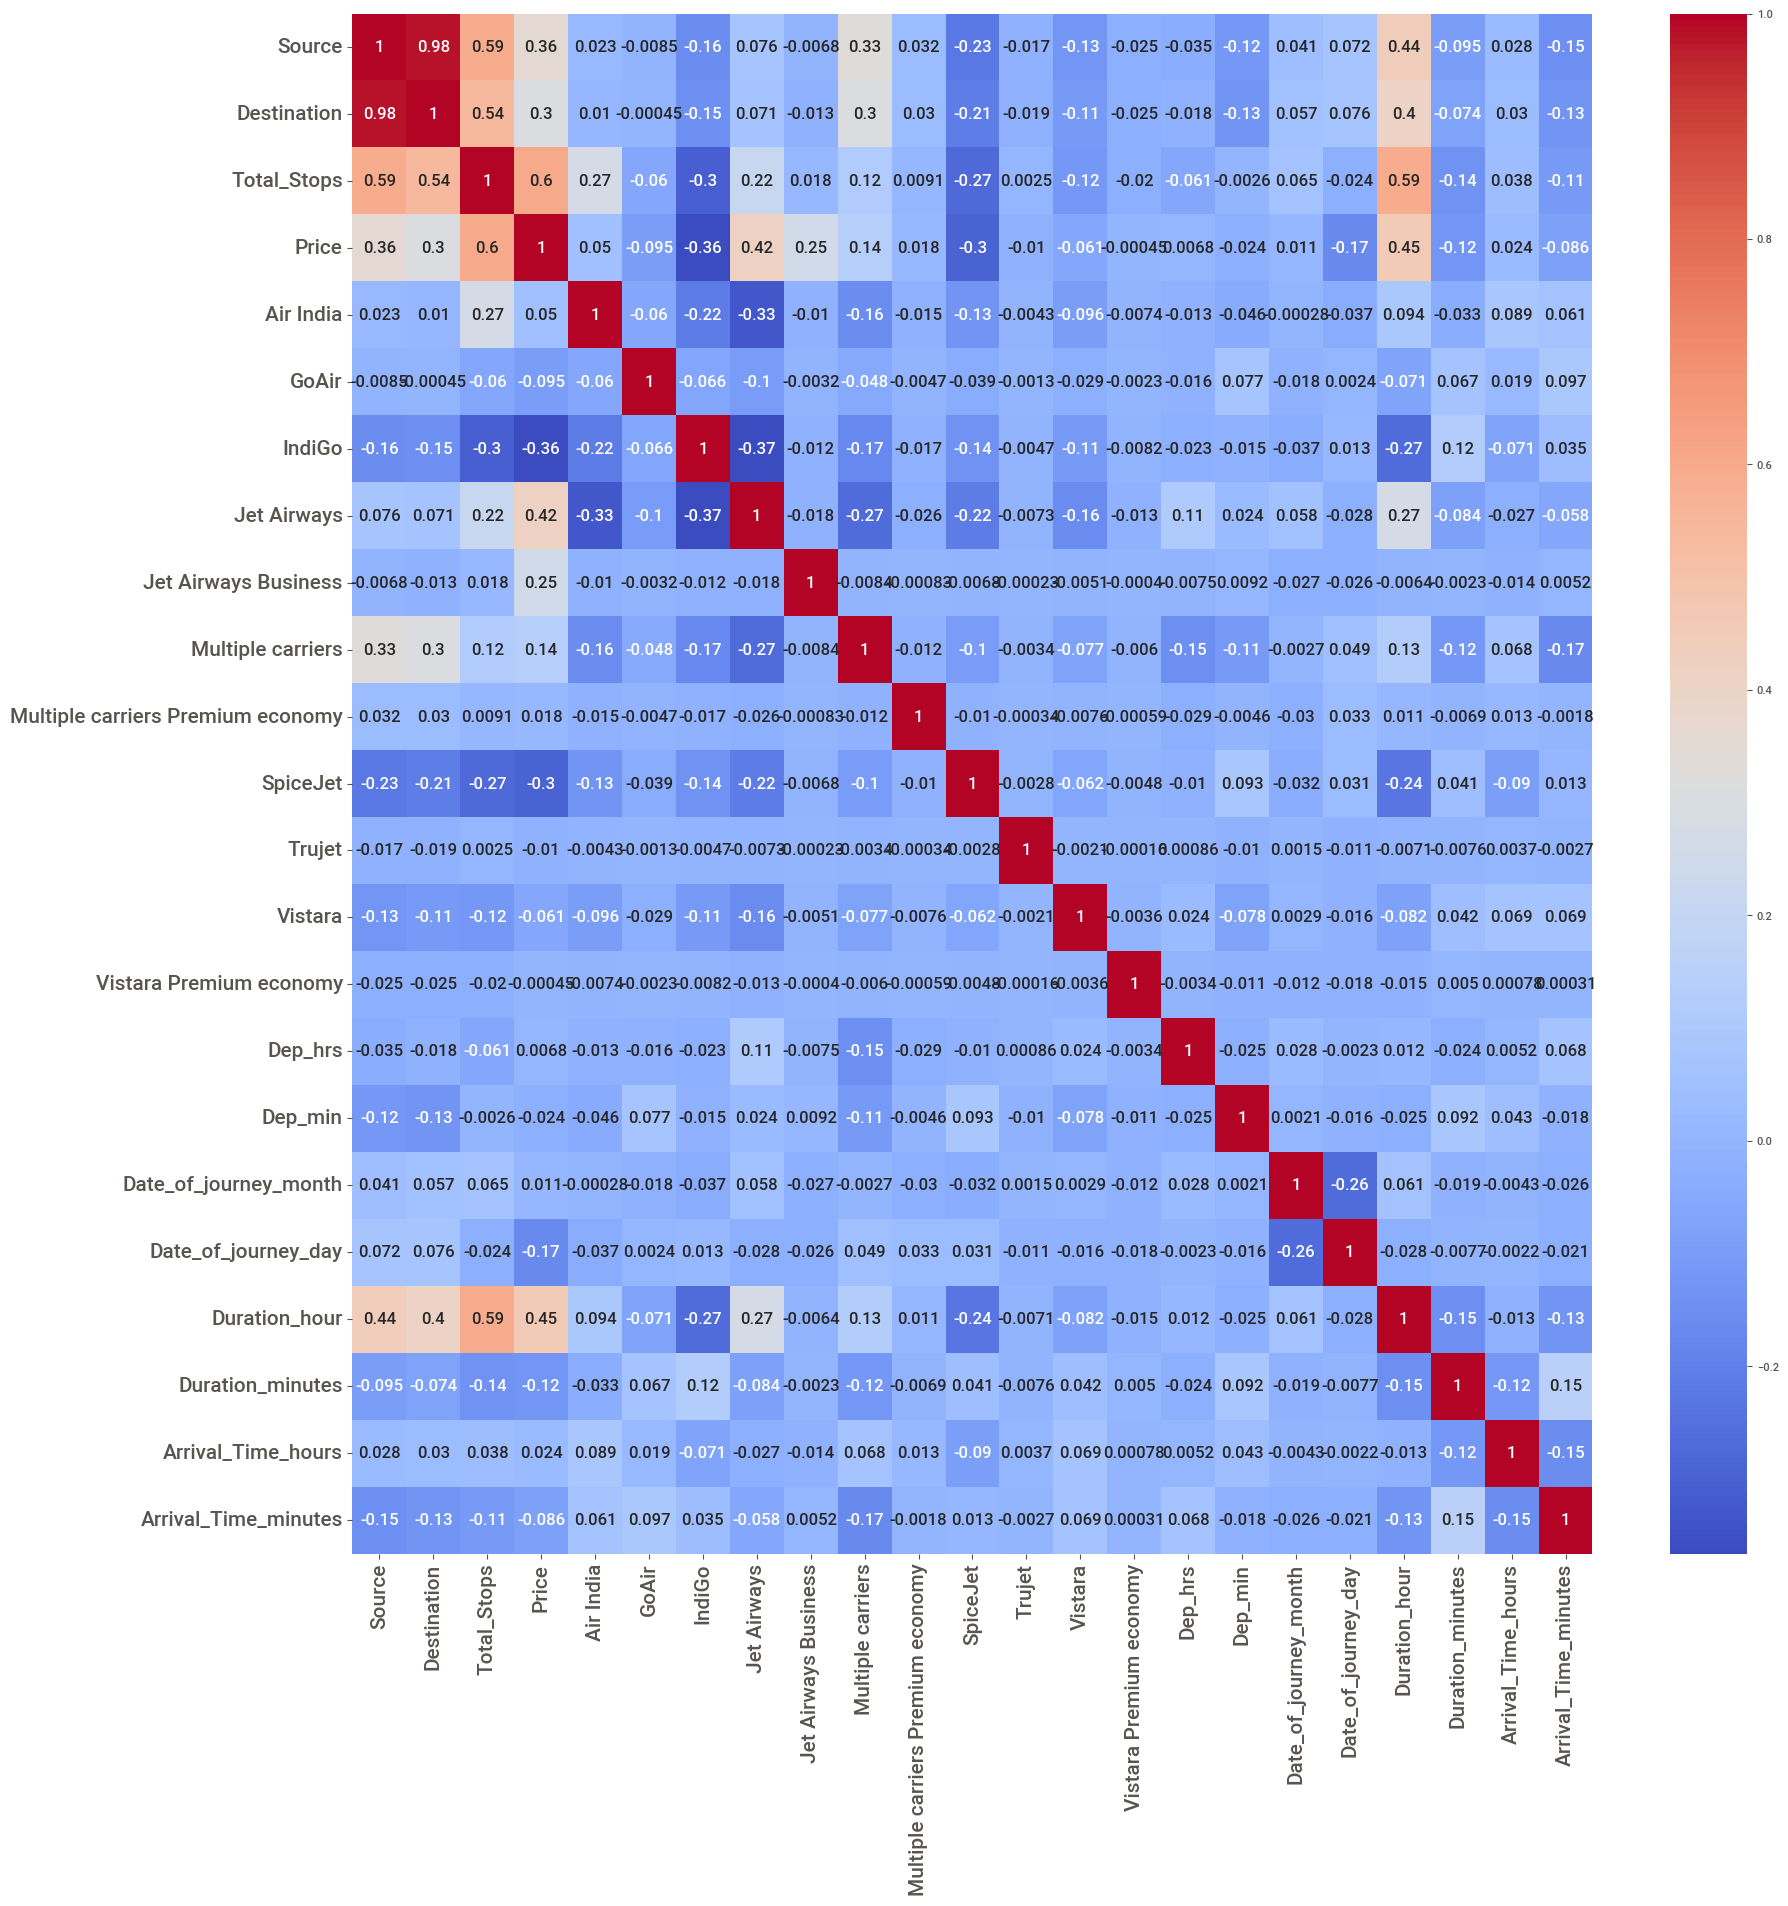

In [558]:

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.tick_params(labelsize=15)  # Corrected 'ticks' to 'tick_params'
plt.show()

In [559]:
data.drop("Destination",axis=1,inplace=True)

##  Insights:
* We observe a few cells indicating high correlation, but it is noteworthy that this correlation is between independent and dependent columns.
* Since we have identified a high correlation between the 'Destination' and 'Source' columns, we are opting to drop one of the columns.

# 9. Model Creation:
# Linear Regression:-
## Split data into X & Y:

In [560]:
x = data.drop("Price",axis=1)
y = pd.DataFrame(data.Price)

In [561]:
# Creating training and testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011, 1)
(2671, 1)


## Model Building:

In [62]:
# import linear regression model
from sklearn.linear_model import LinearRegression


# initialise model
model = LinearRegression()

# Train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [63]:
# make prediction of test model:
y_pred = model.predict(x_test)

##  Evaluate the Module:


### loss functions to know the difference between actual and predicted values
### Different Error/Loss functions in regression algorithem are
- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root mean square Error)

**Train : x_train , y_train**

**Prediction : x_test**

**Evaluate : y_test , y_pred**

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [66]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

8562678.490319585

In [67]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

2017.7931023829024

In [68]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

2926.2054764352392

In [69]:
# R2-score
r2_score(y_test,y_pred)

0.6263839255584537

In [70]:
# size of test data 
y_test.shape

(2671, 1)

In [71]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.6263839255584537

In [72]:
# adjusted r2 score
adj_r2=1-(1-lr_score)*(2671-1)/(2671-21-1)
adj_r2

0.6234220767236962

# KNN:-
## Split data into X & Y:

In [73]:
x = data.drop("Price",axis=1)
y = data.Price

In [74]:
# Creating training and testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


## Model Building:

In [76]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [77]:
y_pred = KNN.predict(x_test)

In [78]:
(y_test!=y_pred).sum()

2648

In [79]:
len(y_test)

2671

In [80]:
(y_test!=y_pred).sum()/len(y_test)

0.9913889928865594

In [81]:
## taking optimal k to determine how many nearest neighbors  to create
# create a list to store the error values for each k
ERROR_RATE=[]
for i in range(1,21):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred = KNN.predict(x_test)
    error_rate = (y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [82]:
ERROR_RATE

[0.7970797454137027,
 0.9322351179333583,
 0.9726694122051666,
 0.9853987270685136,
 0.9913889928865594,
 0.9940097341819544,
 0.9962560838637214,
 0.9977536503182328,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Error Rate')

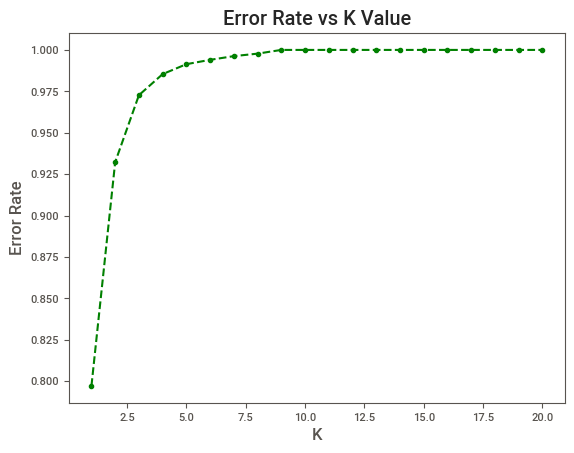

In [83]:
# lets plot error rate and k value:
plt.plot(range(1,21),ERROR_RATE,color="green",marker='o',linestyle='--')
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [84]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [85]:
y_pred = KNN.predict(x_test)

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [87]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

9974362.115687009

In [88]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

2018.3684013478098

In [89]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

3158.2213531807756

In [90]:
# R2-score
r2_score(y_test,y_pred)

0.5647878145916034

In [91]:
# size of test data 
y_test.shape

(2671,)

In [92]:
knn_score =r2_score(y_test,y_pred)
knn_score

0.5647878145916034

In [93]:
# adjusted r2 score
adj_r2=1-(1-knn_score)*(2671-1)/(2671-21-1)
adj_r2

0.5613376613663953

#  Decision Tree:
## Split data into X & Y:

In [94]:
x = data.drop("Price",axis=1)
y = data.Price

In [95]:
# creating Training & Testing:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [96]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


## Model Building:

In [97]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
y_pred = DT.predict(x_test)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [100]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

5165329.127105328

In [101]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1330.9342942718083

In [102]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

2272.7360443098814

In [103]:
# R2-score
r2_score(y_test,y_pred)

0.7494143255718059

In [104]:
DT_score =r2_score(y_test,y_pred)
DT_score

0.7494143255718059

In [105]:
# adjusted r2 score
adj_r2=1-(1-DT_score)*(2671-1)/(2671-21-1)
adj_r2

0.7474278026714691

# Random Forest:
## Split data into X & Y:

In [106]:
x = data.drop("Price",axis=1)
y = data.Price

In [107]:
# creating Training & Testing:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


## Model Building:

In [109]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
y_pred = RFR.predict(x_test)

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [112]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

3468082.3206318733

In [113]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1170.3646772378272

In [114]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1862.2787977722007

In [115]:
# R2-score
r2_score(y_test,y_pred)

0.8317528804258297

In [116]:
RFR_score =r2_score(y_test,y_pred)
RFR_score

0.8317528804258297

In [117]:
# adjusted r2 score
adj_r2=1-(1-RFR_score)*(2671-1)/(2671-21-1)
adj_r2

0.8304190980509496

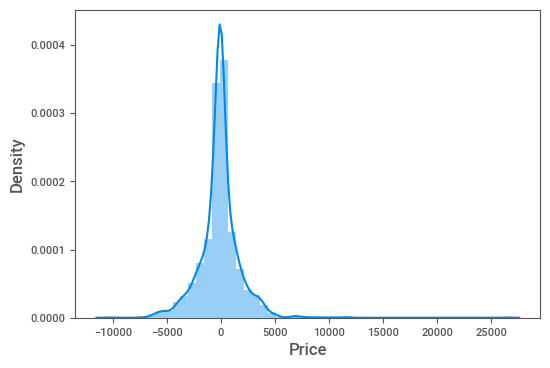

In [118]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

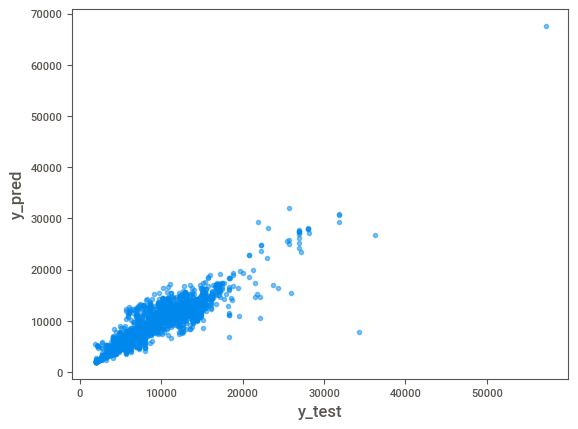

<Figure size 600x400 with 0 Axes>

In [119]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()


## Hyper Parameter Tunning:

In [231]:
from sklearn.model_selection import RandomizedSearchCV

In [244]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1000,num=10)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 30, num=5)]
min_samples_split=[2,3,5,10,15]
min_samples_leaf=[2,3,5,10,15]

In [245]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

In [307]:
rf_random=RandomizedSearchCV(estimator=RFR,
                             param_distributions=random_grid,
                             scoring='neg_mean_squared_error',
                             n_iter=200,
                             cv=4,
                             verbose=2,
                             random_state=78,
                             n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 5, 10, 15],
                                        'min_samples_split': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=78, scoring='neg_mean_squared_error',
                   verbose=2)

In [308]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 12}

In [309]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 5,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 12)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [310]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [311]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

3112509.7550900453

In [312]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1170.962553211189

In [313]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1764.2306411266202

In [314]:
# R2-score
r2_score(y_test,y_pred)

0.8490027765993181

In [315]:
rf_random_score =r2_score(y_test,y_pred)
rf_random_score

0.8490027765993181

In [316]:
# adjusted r2 score
adj_r2=1-(1-rf_random_score)*(2671-1)/(2671-21-1)
adj_r2

0.8478057431182255

In [317]:
Prediction = rf_random.predict(x_test)

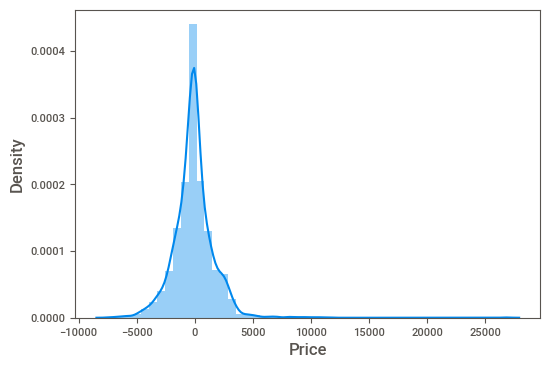

In [318]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-Prediction)
plt.show()

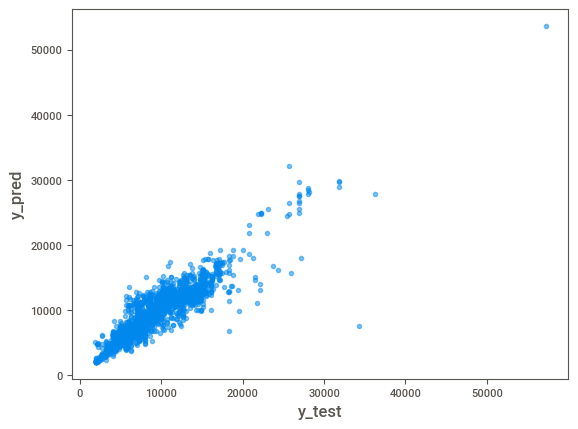

<Figure size 600x400 with 0 Axes>

In [319]:
plt.scatter(y_test, Prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

# Gradiant Boosting:
## Split data into X & Y:

In [320]:
x = data.drop("Price",axis=1)
y = data.Price

In [321]:
# creating Training & Testing:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [322]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


## Model Building:

In [323]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators=210)
GB.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=210)

In [324]:
y_hat = GB.predict(x_test)

In [325]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [326]:
# MSE
MSE = mean_squared_error(y_test,y_hat)
MSE

4138579.2407042584

In [327]:
# MAE 
MAE = mean_absolute_error(y_test,y_hat)
MAE

1437.7500590771108

In [328]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

2034.349832429088

In [329]:
# R2-score
r2_score(y_test,y_hat)

0.7992250552313638

In [330]:
GB_score=r2_score(y_test,y_hat)
GB_score

0.7992250552313638

In [331]:
# adjusted r2 score
adj_r2=1-(1-GB_score)*(2671-1)/(2671-21-1)
adj_r2

0.797633407877592

## Hyper Parameter Tunning:

In [332]:
from sklearn.model_selection import RandomizedSearchCV

In [333]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000 ],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 9, 11],
    'min_samples_split': [2, 4, 8, 10 ],
    'min_samples_leaf': [1, 2, 4, 8],
    'subsample': [0.8,0.9, 1.0, 2.0 ]
}

In [393]:
rsc=RandomizedSearchCV(estimator=GB,
                       param_distributions=param_grid,
                       scoring='neg_mean_squared_error',
                       n_iter=100,
                       cv=4,
                       verbose=2,
                       random_state=43,
                       n_jobs=-1)

In [394]:
rsc.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(n_estimators=210),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'max_depth': [3, 5, 9, 11],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0, 2.0]},
                   random_state=43, scoring='neg_mean_squared_error',
                   verbose=2)

In [395]:
rsc.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 9,
 'learning_rate': 0.01}

In [396]:
gradiant_boosting=GradientBoostingRegressor(
 subsample= 0.8,
 n_estimators= 500,
 min_samples_split= 10,
 min_samples_leaf= 4,
 max_depth= 9,
 learning_rate= 0.01)
gradiant_boosting.fit(x_train,y_train)
y_pred=gradiant_boosting.predict(x_test)

In [397]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [398]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

3017511.0763932406

In [399]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1158.3200521761507

In [400]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1737.0984647950272

In [401]:
# R2-score
r2_score(y_test,y_pred)

0.8536114486481343

In [402]:
GBST_score=r2_score(y_test,y_pred)
GBST_score

0.8536114486481343

In [403]:
# adjusted r2 score
adj_r2=1-(1-GBST_score)*(2671-1)/(2671-21-1)
adj_r2

0.852450950506047

# 10.RESULT:

Comparison of the Best Models Evaluated by Cross Validation
LinearRegressor - CV: 0.62

KNeighborsRegressor - CV: 0.56

DecisionTreeRegressor - CV: 0.74

RandomForestRegressor - CV: 0.84

GradientBoostingRegressor - CV: 0.85



In [404]:
scores = [lr_score,knn_score,DT_score,rf_random_score,GBST_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Linear Regression is: 0.6263839255584537 %
The R2 score achieved using KNN is: 0.5647878145916034 %
The R2 score achieved using Decision Tree is: 0.7494143255718059 %
The R2 score achieved using Random Forest is: 0.8490027765993181 %
The R2 score achieved using Gradient Boosting is: 0.8536114486481343 %


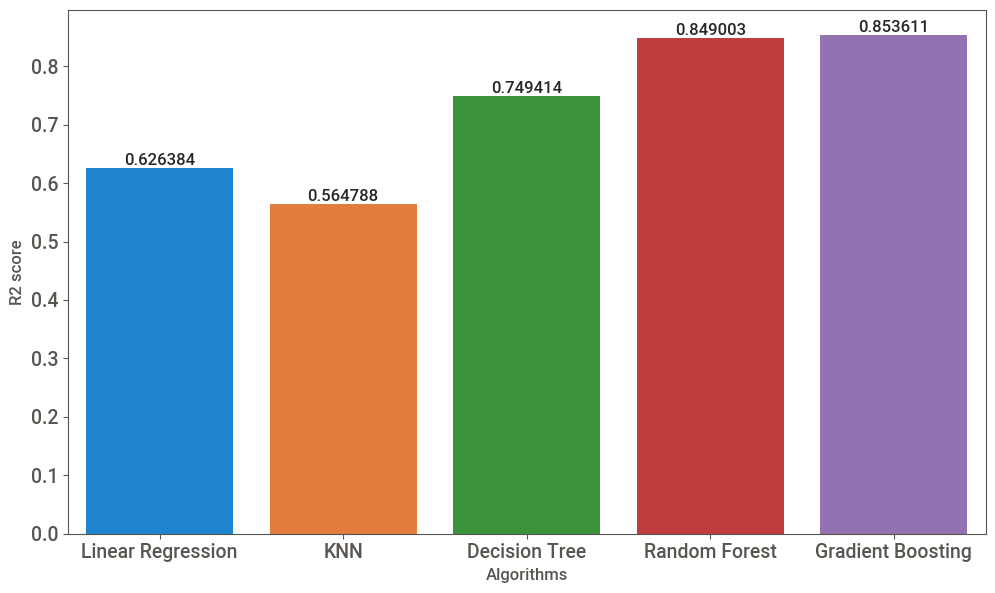

In [405]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Conclusion

"In conclusion, the application of machine learning in predicting flight fares has proven to be a valuable tool for both travelers and airlines. The analysis has revealed several crucial insights:

**Model Performance**:- The Gradient Boosting model stands out as the top performer, achieving an impressive R-squared (r2_score) of 0.85. This high level of accuracy indicates the model's effectiveness in predicting flight fares, offering valuable insights into pricing trends.

**Alternative Model**:- The Random Forest model, while slightly less accurate with an R-squared of 0.84, still demonstrates strong predictive capabilities. This suggests the availability of multiple machine learning approaches for flight fare prediction, providing flexibility in model selection.

**Influential Features**:- Key features such as Total_Stops, Duration, Airline, and Route have been identified as significant contributors to flight fares. Understanding these factors is valuable for both travelers and airlines, enabling informed decision-making for travelers and optimizing pricing strategies for airlines.

In summary, machine learning-based flight fare prediction proves to be a powerful tool for optimizing pricing strategies in the aviation industry. The continuous advancement of machine learning techniques and the availability of comprehensive data are expected to further enhance the accuracy and utility of these models, solidifying their role in shaping pricing dynamics for airlines and providing valuable insights to travelers."

## Challenges Faced



Challenges Faced in Flight Fare Prediction using Machine Learning:

**Converting Date and Time**:
Handling date and time data poses a significant challenge due to its often non-standard format. Converting these data into a machine-readable format requires meticulous preprocessing. In the context of flight fare prediction, extracting information such as day of the week, month, or time of day from date and time columns necessitates careful parsing and feature engineering to create meaningful inputs for the model.

**Feature Correlation**:
Dealing with a large number of features can be intricate, particularly in identifying meaningful correlations between them. Conducting correlation analysis is crucial to pinpoint features strongly linked to the target variable (flight fare). Techniques such as correlation matrices, scatter plots, and statistical tests aid in understanding feature relationships. However, with an extensive set of columns, this process can become complex and time-consuming.

**Hyperparameter Tuning**:
Fine-tuning hyperparameters to optimize model performance is a crucial but time-intensive task. This process involves multiple iterations of training and evaluating the model with different hyperparameter configurations. As it entails navigating a high-dimensional space of hyperparameters, and each iteration demands model training, it can be computationally expensive and time-consuming. Efficient strategies, such as grid search or random search, are often employed to navigate this hyperparameter space effectively.